# 사례 기반 학습과 모델 기반 학습

### 예제 1-1 사이킷런을 이용한 선형 모델의 훈련과 실행

In [2]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

#일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

sn.set()
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

#한글출력
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [14]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [15]:
import pandas as pd
import sklearn.linear_model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49334 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/loca

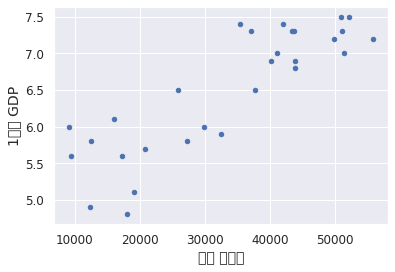

In [18]:
# Data load
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',', 
                             delimiter='\t', encoding='latin1', na_values='n/a')

# Data prepare
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Data visualization
ax = country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
ax.set(xlabel='삶의 만족도', ylabel='1인당 GDP')
plt.show()

In [20]:
#Linear Regression
model=sklearn.linear_model.LinearRegression()

#Model train
model.fit(X,y)

#키프로스에 대한 예측
X_new=[[22587]] #키프로스 1인당 GDP
print(model.predict(X_new))

[[5.96242338]]


In [23]:
import sklearn.neighbors
#선형 회귀 모델을 k-최근접 이웃 회귀 모델로 교체할 경우
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
#모델 훈련
knn.fit(X,y)

#키프로스에 대한 예측
print(knn.predict(X_new))

[[5.76666667]]
